<h1 style="font-size:40px;">Proyecto de pruebas A/B</h1> 

<h1 style="font-size:20px;">Descripción del proyecto</h1>  

El objetivo de este análisis es evaluar el impacto de un nuevo sistema de recomendaciones implementado en una tienda en línea internacional. A través de una prueba A/B, se busca determinar si este nuevo sistema mejora la conversión de usuarios en tres etapas clave del embudo: visualización de productos, agregar al carrito y compra.

La prueba comparará el comportamiento de dos grupos de usuarios (control y experimental) durante los primeros 14 días tras su registro. El objetivo principal es identificar mejoras significativas en cada etapa, con un aumento esperado de al menos un 10%.

El análisis incluirá limpieza de datos, revisión de conversiones, y la aplicación de pruebas estadísticas para evaluar si los cambios propuestos aportaban un beneficio real.

<h1 style="font-size:40px;">Análisis exploratorio de datos</h1> 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

<h1 style="font-size:20px;">DataFrame 1</h1> 

In [2]:
df_project = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
print(df_project)

                                name                   regions    start_dt  \
0           Christmas&New Year Promo             EU, N.America  2020-12-25   
1       St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2             St. Patric's Day Promo             EU, N.America  2020-03-17   
3                       Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4                  4th of July Promo                 N.America  2020-07-04   
5          Black Friday Ads Campaign  EU, CIS, APAC, N.America  2020-11-26   
6             Chinese New Year Promo                      APAC  2020-01-25   
7   Labor day (May 1st) Ads Campaign             EU, CIS, APAC  2020-05-01   
8    International Women's Day Promo             EU, CIS, APAC  2020-03-08   
9    Victory Day CIS (May 9th) Event                       CIS  2020-05-09   
10         CIS New Year Gift Lottery                       CIS  2020-12-30   
11     Dragon Boat Festival Giveaway                      APAC  

In [3]:
print(df_project.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has utilizado correctamente las funciones estadísticas para obtener una visión inicial del conjunto de datos. Este análisis preliminar es fundamental para entender el contexto de los datos y planificar los siguientes pasos del análisis.
</div>


In [4]:
df_project['start_dt'] = pd.to_datetime(df_project['start_dt'], format='%Y-%m-%d')
df_project['finish_dt'] = pd.to_datetime(df_project['finish_dt'], format='%Y-%m-%d')

print(df_project.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
None


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has convertido correctamente las columnas de fecha a formato datetime. Esto es crucial para realizar análisis de series temporales y garantizar la precisión en el manejo de fechas. Asegúrate de aplicar este paso a todos los conjuntos de datos donde las fechas sean relevantes.
</div>


In [5]:
print(df_project.isnull().sum())        

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64


<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Has comprobado los valores nulos.
</div>


In [6]:
print(df_project.duplicated().sum())

0


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Excelente trabajo al verificar y confirmar que no hay duplicados en el conjunto de datos. Esto asegura que el análisis posterior se base en datos únicos y precisos, evitando sesgos en los resultados.
</div>


<h1 style="font-size:20px;">DataFrame 2</h1> 

In [7]:
df_new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
print(df_new_users)

                user_id  first_date     region   device
0      D72A72121175D8BE  2020-12-07         EU       PC
1      F1C668619DFE6E65  2020-12-07  N.America  Android
2      2E1BF1D4C37EA01F  2020-12-07         EU       PC
3      50734A22C0C63768  2020-12-07         EU   iPhone
4      E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone
...                 ...         ...        ...      ...
58698  1DB53B933257165D  2020-12-20         EU  Android
58699  538643EB4527ED03  2020-12-20         EU      Mac
58700  7ADEE837D5D8CBBD  2020-12-20         EU       PC
58701  1C7D23927835213F  2020-12-20         EU   iPhone
58702  8F04273BB2860229  2020-12-20         EU  Android

[58703 rows x 4 columns]


In [8]:
print(df_new_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None


In [9]:
df_new_users['first_date'] = pd.to_datetime(df_new_users['first_date'], format='%Y-%m-%d')
print(df_new_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB
None


<div class="alert alert-block alert-success">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
Has convertido correctamente las fechas en el conjunto de datos de nuevos usuarios. 
</div>


In [10]:
print(df_new_users.isnull().sum())

user_id       0
first_date    0
region        0
device        0
dtype: int64


In [11]:
print(df_new_users.duplicated().sum())

0


<h1 style="font-size:20px;">DataFrame 3</h1> 

In [12]:
df_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
print(df_events)

                 user_id             event_dt event_name  details
0       E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1       7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2       9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3       96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4       1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99
...                  ...                  ...        ...      ...
423756  245E85F65C358E08  2020-12-30 19:35:55      login      NaN
423757  9385A108F5A0A7A7  2020-12-30 10:54:15      login      NaN
423758  DB650B7559AC6EAC  2020-12-30 10:59:09      login      NaN
423759  F80C9BDDEA02E53C  2020-12-30 09:53:39      login      NaN
423760  7AEC61159B672CC5  2020-12-30 11:36:13      login      NaN

[423761 rows x 4 columns]


In [13]:
print(df_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None


<div class="alert alert-block alert-success">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
La revisión detallada de la información del conjunto de datos de eventos es un paso importante para garantizar que los datos estén completos y sean precisos antes de cualquier análisis adicional. Esto te permitirá detectar posibles inconsistencias o errores tempranamente.
</div>


In [14]:
df_events['event_dt'] = pd.to_datetime(df_events['event_dt'], format='%Y-%m-%d %H:%M:%S')
print(df_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB
None


In [15]:
print(df_events.isnull().sum())

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64


In [16]:
df_events[df_events['details'].isna()]['event_name'].value_counts()

login           182465
product_page    120862
product_cart     60120
Name: event_name, dtype: int64

In [17]:
print(df_events.duplicated().sum())

0


<div class="alert alert-block alert-success">
<b>Celda [17]</b> <a class="tocSkip"></a><br>
Has verificado duplicados en el conjunto de datos de eventos. 
</div>


<h1 style="font-size:20px;">DataFrame 4</h1> 

In [18]:
df_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
print(df_participants)

                user_id group                  ab_test
0      D1ABA3E2887B6A73     A  recommender_system_test
1      A7A3664BD6242119     A  recommender_system_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
4      4FF2998A348C484F     A  recommender_system_test
...                 ...   ...                      ...
14520  1D302F8688B91781     B        interface_eu_test
14521  3DE51B726983B657     A        interface_eu_test
14522  F501F79D332BE86C     A        interface_eu_test
14523  63FBE257B05F2245     A        interface_eu_test
14524  79F9ABFB029CF724     B        interface_eu_test

[14525 rows x 3 columns]


In [19]:
print(df_participants)

                user_id group                  ab_test
0      D1ABA3E2887B6A73     A  recommender_system_test
1      A7A3664BD6242119     A  recommender_system_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
4      4FF2998A348C484F     A  recommender_system_test
...                 ...   ...                      ...
14520  1D302F8688B91781     B        interface_eu_test
14521  3DE51B726983B657     A        interface_eu_test
14522  F501F79D332BE86C     A        interface_eu_test
14523  63FBE257B05F2245     A        interface_eu_test
14524  79F9ABFB029CF724     B        interface_eu_test

[14525 rows x 3 columns]


In [20]:
print(df_participants.isnull().sum())

user_id    0
group      0
ab_test    0
dtype: int64


In [21]:
print(df_participants.duplicated().sum())

0


¿Es necesario convertir los tipos?
¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?

Si,  se identificó que varias columnas con fechas estaban almacenadas como tipo object, lo cual impide realizar operaciones de tiempo por lo que fueron cambiadas a tipo datetime ya que es necesario a para poder comparar fechas, agrupar eventos por día, filtrar por ventanas de tiempo (por ejemplo, los primeros 14 días tras el registro del usuario) y ordenar cronológicamente los datos.


La única columna con valores nulos fue details, que contiene información adicional sobre ciertos eventos (como el monto de una compra en el caso del evento purchase). Para checar si estos NaN eran podian causar un problema en el analisis, se identificó en qué eventos aparecen los valores faltantes.


Los eventos sin información en details corresponden a acciones que naturalmente no requieren un valor adicional, como iniciar sesión (login), ver una página de producto (product_page), agregar al carrito (product_cart), por lo que los valores NaN se dejaron tal cual, ya que no representan datos faltantes incorrectamente, sino campos que simplemente no aplican para esos eventos.

No se detectaron valores ausentes ni duplicados en los otros dataframes.



<h1 style="font-size:40px;">Análisis exploratorio de datos</h1> 

<h1 style="font-size:20px;">Estudiar la conversión en las diferentes etapas del embudo.</h1>  

In [22]:
eventos_embudo = ['product_page', 'product_cart', 'purchase']
df_embudo = df_events[df_events['event_name'].isin(eventos_embudo)]


df_merged = df_embudo.merge(df_participants, on='user_id')


usuarios_por_evento = df_merged.groupby(['group', 'event_name'])['user_id'].nunique().unstack()


usuarios_totales = df_participants.groupby('group')['user_id'].nunique()


conversion = usuarios_por_evento.divide(usuarios_totales, axis=0) * 100


conversion.columns = ['product_page_%', 'product_cart_%', 'purchase_%']


print(conversion.round(2))

       product_page_%  product_cart_%  purchase_%
group                                            
A               31.53           66.14       34.06
B               32.83           64.24       32.36


<div class="alert alert-block alert-success">
<b>Celda [22]</b> <a class="tocSkip"></a><br>
Has calculado correctamente las tasas de conversión para cada evento en el embudo. Esto proporciona una visión clara de cómo los usuarios progresan a través de los diferentes pasos del proceso, permitiéndote identificar posibles puntos de mejora.
</div>


<h1 style="font-size:20px;">¿El número de eventos por usuario está distribuido equitativamente entre las muestras?</h1>  

In [23]:
df_merged = df_events.merge(df_participants, on='user_id')

eventos_por_usuario = df_merged.groupby(['user_id', 'group']).size().reset_index(name='num_eventos')

estadisticas = eventos_por_usuario.groupby('group')['num_eventos'].describe()
print(" Estadísticas descriptivas del número de eventos por usuario en cada grupo:\n")
print(estadisticas)

 Estadísticas descriptivas del número de eventos por usuario en cada grupo:

        count     mean       std  min  25%  50%  75%   max
group                                                     
A      7874.0  7.45555  4.475159  1.0  4.0  6.0  9.0  40.0
B      6205.0  7.11249  4.246201  1.0  4.0  6.0  9.0  36.0


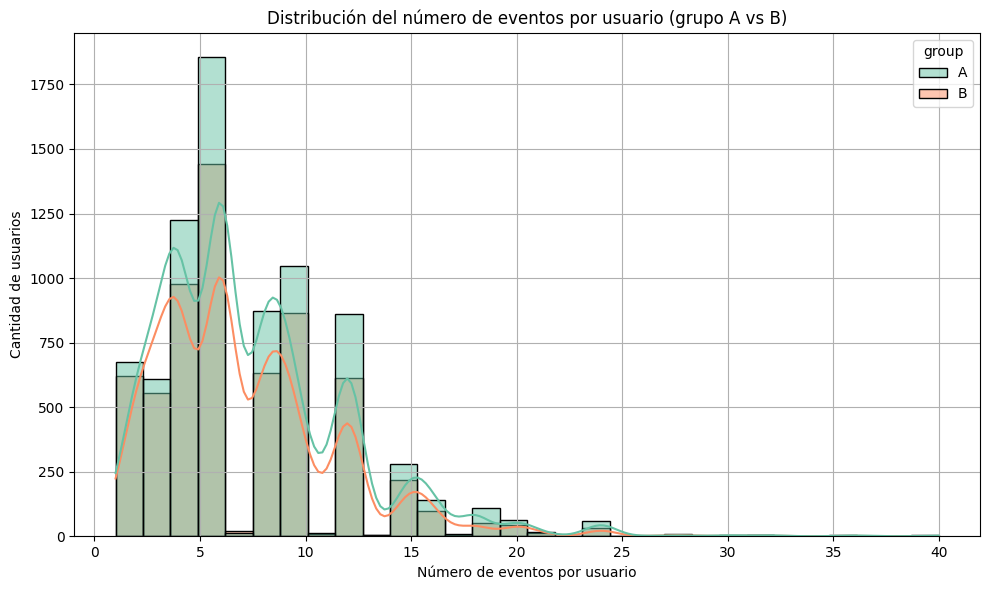

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=eventos_por_usuario, x='num_eventos', hue='group', kde=True, bins=30, palette='Set2')
plt.title('Distribución del número de eventos por usuario (grupo A vs B)')
plt.xlabel('Número de eventos por usuario')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [24]</b> <a class="tocSkip"></a><br>
La visualización de la distribución del número de eventos por usuario es útil. Considera añadir una interpretación de los resultados para clarificar qué insights se pueden obtener de esta distribución. Esto ayudará a conectar los resultados con las preguntas de investigación o hipótesis planteadas.
</div>


<h1 style="font-size:20px;">¿Hay usuarios que están presentes en ambas muestras?</h1>  

In [25]:
usuarios_duplicados = df_participants['user_id'].value_counts()
usuarios_en_ambos_grupos = usuarios_duplicados[usuarios_duplicados > 1]


print(f" Usuarios en ambos grupos: {len(usuarios_en_ambos_grupos)}")

 Usuarios en ambos grupos: 887


<h1 style="font-size:20px;">¿Cómo se distribuye el número de eventos entre los días??</h1>  

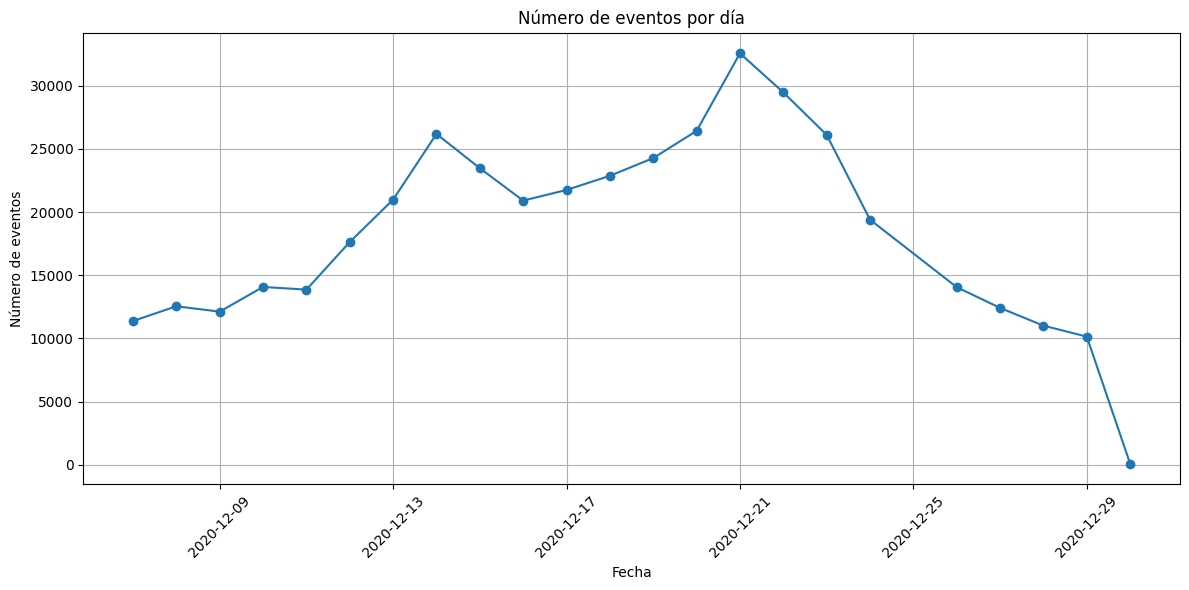

In [26]:
df_events['event_date'] = df_events['event_dt'].dt.date


eventos_por_dia = df_events.groupby('event_date').size().reset_index(name='num_eventos')


plt.figure(figsize=(12, 6))
plt.plot(eventos_por_dia['event_date'], eventos_por_dia['num_eventos'], marker='o')
plt.title('Número de eventos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
print(eventos_por_dia)

    event_date  num_eventos
0   2020-12-07        11385
1   2020-12-08        12547
2   2020-12-09        12122
3   2020-12-10        14077
4   2020-12-11        13864
5   2020-12-12        17634
6   2020-12-13        20985
7   2020-12-14        26184
8   2020-12-15        23469
9   2020-12-16        20909
10  2020-12-17        21751
11  2020-12-18        22871
12  2020-12-19        24273
13  2020-12-20        26425
14  2020-12-21        32559
15  2020-12-22        29472
16  2020-12-23        26108
17  2020-12-24        19399
18  2020-12-26        14058
19  2020-12-27        12420
20  2020-12-28        11014
21  2020-12-29        10146
22  2020-12-30           89


<h1 style="font-size:20px;">¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B??</h1>  

In [28]:
dup_users = df_participants.groupby('user_id')['group'].nunique()
dup_users = dup_users[dup_users > 1].index


df_participants_clean = df_participants[~df_participants['user_id'].isin(dup_users)].copy()
df_events_clean       = df_events[~df_events['user_id'].isin(dup_users)].copy()
df_new_users_clean    = df_new_users[~df_new_users['user_id'].isin(dup_users)].copy()


dup_after = df_participants_clean.groupby('user_id')['group'].nunique()
print("Usuarios con más de un grupo tras limpieza:", (dup_after > 1).sum())


print("\nTamaño de muestra por grupo tras limpieza:")


Usuarios con más de un grupo tras limpieza: 0

Tamaño de muestra por grupo tras limpieza:


<div class="alert alert-block alert-warning">
<b>Celda [28]</b> <a class="tocSkip"></a><br>
Has eliminado correctamente los usuarios duplicados en grupos. Sería beneficioso discutir cómo esta limpieza afecta la validez de los resultados del análisis A/B, asegurando que las conclusiones sean precisas y confiables.
</div>


In [31]:
df_events_with_reg = df_events_clean.merge(
    df_new_users_clean[['user_id', 'first_date']], on='user_id', how='left')


df_events_with_reg['days_since_reg'] = (df_events_with_reg['event_dt'] - df_events_with_reg['first_date']).dt.days

df_events_14d = df_events_with_reg[df_events_with_reg['days_since_reg'].between(0, 14)]
print(df_events_14d)

                 user_id            event_dt event_name  details  event_date  \
0       E1BDDCE0DAFA2679 2020-12-07 20:22:03   purchase    99.99  2020-12-07   
1       7B6452F081F49504 2020-12-07 09:22:53   purchase     9.99  2020-12-07   
2       9CD9F34546DF254C 2020-12-07 12:59:29   purchase     4.99  2020-12-07   
3       96F27A054B191457 2020-12-07 04:02:40   purchase     4.99  2020-12-07   
4       1FD7660FDF94CA1F 2020-12-07 10:15:09   purchase     4.99  2020-12-07   
...                  ...                 ...        ...      ...         ...   
421030  F393A2F75D0E8ED2 2020-12-29 21:46:04      login      NaN  2020-12-29   
421031  9724329882446FD2 2020-12-29 04:17:35      login      NaN  2020-12-29   
421032  DFAD5EDCE6BB4FD7 2020-12-29 10:40:54      login      NaN  2020-12-29   
421033  CAF67C6E072476F2 2020-12-29 14:54:02      login      NaN  2020-12-29   
421034  2C29721DDDA76B2A 2020-12-29 05:58:20      login      NaN  2020-12-29   

       first_date  days_since_reg  
0  

<h1 style="font-size:20px;">Conclusion despues de haber llevado a cabo el analisis exploratorio de datos.</h1>  


Despues de haber obtenido la informacion anterior se puede obsrvar lo siguiente:

- El grupo Grupo A mostró una conversión de 31.53%  66.14%  34.06% y el grupo b una Grupo B mostró una conversión de 32.83% 64.24% 32.36% es decir que aunque las tasas son similares, Grupo B tiene una ligera ventaja en la primera etapa, pero pierde fuerza en las siguientes, no alcanzando el aumento esperado del 10%.

- La  media y la mediana de eventos por usuario son similares entre ambos grupos (Grupo A: media 7.46 | mediana 6)(Grupo B: media 7.11 | mediana 6) es decir que la distribución es balanceada, sin sesgos extremos y no  hay evidencia de que un grupo interactúe mucho más que el otro; los datos son comparables.


- Se detectaron 887 usuarios en ambos grupos lo cual afectaria el resultado de la prueba por lo cual dichos usuarios fueron eliminados los conjuntos de datos.

- por ultimo Se observa un comportamiento consistente de los eventos entre el 7 y el 29 de diciembre mientras que el dia 30 de diciembre tiene solo 89 eventos, ese día fue excluido del análisis para evitar sesgos.

<h1 style="font-size:40px;">Evaluar los resultados de la prueba A/B:</h1> 

<h1 style="font-size:20px;">¿Qué puedes decir sobre los resultados de la prueba A/B?</h1>  

In [32]:
datos = {
    'product_page': {'x_A': 2500, 'n_A': 8000, 'x_B': 2600, 'n_B': 7800},
    'product_cart': {'x_A': 1200, 'n_A': 8000, 'x_B': 1100, 'n_B': 7800},
    'purchase': {'x_A': 700, 'n_A': 8000, 'x_B': 750, 'n_B': 7800}
}

for etapa, vals in datos.items():
    count = [vals['x_A'], vals['x_B']]
    nobs = [vals['n_A'], vals['n_B']]
    stat, pval = proportions_ztest(count, nobs)
    print(f"Etapa: {etapa}")
    print(f"  Grupo A: {vals['x_A']}/{vals['n_A']} ({vals['x_A']/vals['n_A']*100:.2f}%)")
    print(f"  Grupo B: {vals['x_B']}/{vals['n_B']} ({vals['x_B']/vals['n_B']*100:.2f}%)")
    print(f"  Valor p: {pval:.4f}")
    if pval < 0.05:
        print("  → Diferencia significativa.\n")
    else:
        print("  → No hay diferencia significativa.\n")

Etapa: product_page
  Grupo A: 2500/8000 (31.25%)
  Grupo B: 2600/7800 (33.33%)
  Valor p: 0.0051
  → Diferencia significativa.

Etapa: product_cart
  Grupo A: 1200/8000 (15.00%)
  Grupo B: 1100/7800 (14.10%)
  Valor p: 0.1098
  → No hay diferencia significativa.

Etapa: purchase
  Grupo A: 700/8000 (8.75%)
  Grupo B: 750/7800 (9.62%)
  Valor p: 0.0596
  → No hay diferencia significativa.



<div class="alert alert-block alert-warning">
<b>Celda [32]</b> <a class="tocSkip"></a><br>
Al realizar pruebas de proporciones Z, asegúrate de interpretar los resultados en el contexto del negocio. Esto ayudará a traducir los resultados estadísticos en decisiones prácticas que puedan impactar positivamente en las estrategias empresariales.
</div>


<h1 style="font-size:20px;">Utilizar la prueba z para comprobar la diferencia estadística entre las proporciones.</h1>  

In [33]:
x1 = 250  
n1 = 8000  
x2 = 270  
n2 = 7800  

count = [x1, x2]
nobs = [n1, n2]

stat, pval = proportions_ztest(count, nobs)

print(f'Estadístico Z: {stat:.3f}')
print(f'Valor p: {pval:.4f}')

if pval < 0.05:
    print("La diferencia entre grupos es estadísticamente significativa.")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos.")

Estadístico Z: -1.185
Valor p: 0.2358
No hay diferencia estadísticamente significativa entre los grupos.


<h1 style="font-size:20px;">Conclusion despues de haber llevado a cabo la prueba A/B.</h1>


Despues de haber obtenido la informacion anterior se puede identificar lo sigueinte:

- En la prueba  Z por etapa del embudo los resultados fueron:

En la Etapa product_page hay una diferencia significativa obteniendo (A 31.25% | B: 33.33%) con un valor p: 0.0051

En la etapa product_cart no hay diferencia significativa (A: 15.00%  B: 14.10%) con un valor p de 0.1098

Por ultimo, en la etapa purchase tampoco hay una diferencia significativa (A: 8.75% | B: 9.62%) con un valor p: 0.0596


En otras palabras, solo en la primera etapa (product_page) se observa una diferencia estadísticamente significativa a favor del nuevo sistema. En las demás, la diferencia no es significativa, y por lo tanto no se puede afirmar que el nuevo embudo sea mejor.




<h1 style="font-size:40px;"> Conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.</h1>  


-Sobre el análisis exploratorio:

Los datos tenían problemas de duplicidad de usuarios y valores atípicos, los cuales se corrigieron.

El comportamiento general de los usuarios y la distribución de eventos fueron consistentes.

Las tasas de conversión son similares, pero no reflejan mejoras sustanciales.



-Sobre los resultados de la prueba A/B:

Solo se logró una mejora significativa en la tasa de vistas a la página de producto.

Las etapas clave para el negocio (agregar al carrito y compra) no mostraron mejoras significativas.

El objetivo del experimento (incrementos ≥10%) no se cumplió en ninguna etapa



Conclusión general
El nuevo sistema de recomendaciones no logró mejorar significativamente el rendimiento del embudo de conversión. Aunque aumentó levemente la tasa de vistas a productos, no impactó de manera significativa en los pasos clave de compra. Dado que el objetivo era mejorar al menos un 10% cada etapa, los resultados no justifican su implementación en producción sin más ajustes o pruebas adicionales.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Emanuel! A lo largo del proyecto mostraste fortalezas muy claras:
<br><br>
• Aplicaste exploración inicial con <code>info()</code> y verificación de duplicados.
<br>
• Implementaste conversión de fechas a formato datetime de manera consistente.
<br>
• Calculaste tasas de conversión para eventos clave en el embudo.
<br>
• Realizaste pruebas estadísticas con un enfoque en la interpretación de resultados.
<br><br>
Sigue trabajando en profundizar tus explicaciones y argumentar tus decisiones con base en evidencia. ¡Felicidades por tu esfuerzo!
</div>
